# SVM(支持向量机)

### 1.线性Svm函数

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
iris = datasets.load_iris()
X = iris.data
Y = []
y = iris.target
for i in range(100):
    Y.append(y[i])
#获取前一百个数据点
X = X[y<2,:2]
#y = [0:100]
#Y

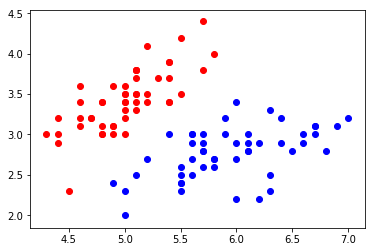

In [9]:
plt.scatter(X[:50, 0], X[:50, 1], color = "red")
plt.scatter(X[50:100, 0], X[50:100, 1], color = "blue")
plt.savefig("原始数据")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
standardScalar = StandardScaler()
standardScalar.fit(X)
X_standard = standardScalar.transform(X)

In [11]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1e9)
len(Y)
svc.fit(X_standard, Y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

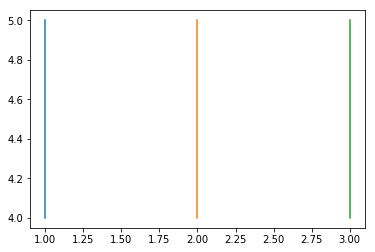

In [12]:
a = [1, 2, 3]
b = [4, 5]

[x, y] = np.meshgrid(a, b)
plt.plot(x, y)


In [13]:
a = np.c_[x, y]
a

array([[1, 2, 3, 4, 4, 4],
       [1, 2, 3, 5, 5, 5]])

In [14]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    print("zz",zz.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#FF6A9A', '#FFF59D', "#90CAF9"])
    print(x0.shape, x1.shape, zz.shape)
    plt.contourf(x0, x1,  zz,linewidth=5, map = custom_cmap)

zz (600, 600)
(600, 600) (600, 600) (600, 600)


/home/gavin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth', 'map'
  s)


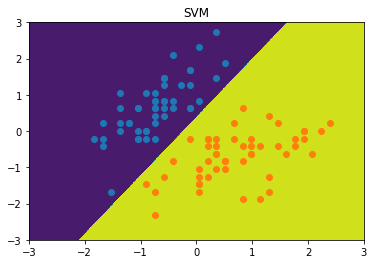

In [15]:
plot_decision_boundary(svc, axis = [-3, 3, -3, 3])
plt.scatter(X_standard[:50, 0], X_standard[:50, 1])
plt.scatter(X_standard[50:100, 0], X_standard[50:100, 1])
plt.title("SVM")
plt.savefig("C为无穷大时")
plt.show()

In [16]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, Y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

zz (600, 600)
(600, 600) (600, 600) (600, 600)


/home/gavin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth', 'map'
  s)


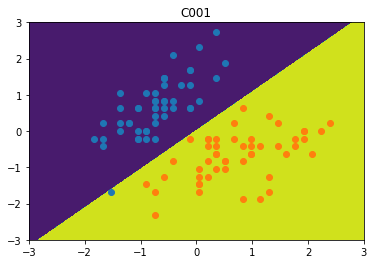

In [19]:
plot_decision_boundary(svc2, axis = [-3, 3, -3, 3])
plt.scatter(X_standard[:50, 0], X_standard[:50, 1])
plt.scatter(X_standard[50:100, 0], X_standard[50:100, 1])
plt.savefig("Soft margin")
plt.title("C001")
plt.show()

In [7]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    plot_x = np.linspace(axis[0], axis[1], 200)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#FF6A9A', '#FFF59D', "#90CAF9"])
    
    #print(x0.shape, x1.shape, zz.shape)
    plt.contourf(x0, x1,  zz,linewidth=5, map = custom_cmap)
    #绘画出两条双线    
    w = model.coef_[0]
    b = model.intercept_[0]
        
    up_y = -w[0]/w[1]*plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1]*plot_x - b/w[1] - 1/w[1]
    #保证数据可以在(-3, 3)之间
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='blue')
    plt.plot(plot_x[down_index], down_y[down_index], color='blue')

/home/gavin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth', 'map'
  s)


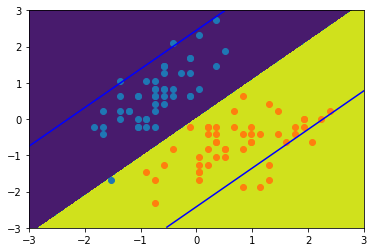

In [20]:
plot_svc_decision_boundary(svc２, axis = [-3, 3, -3, 3])
plt.scatter(X_standard[:50, 0], X_standard[:50, 1])
plt.scatter(X_standard[50:100, 0], X_standard[50:100, 1])
plt.savefig("C001penalty")
plt.show()

/home/gavin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth', 'map'
  s)


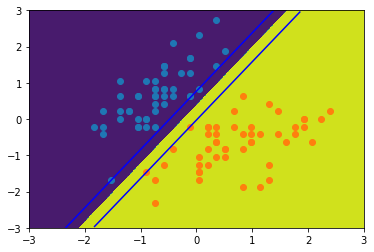

In [21]:
plot_svc_decision_boundary(svc, axis = [-3, 3, -3, 3])
plt.scatter(X_standard[:50, 0], X_standard[:50, 1])
plt.scatter(X_standard[50:100, 0], X_standard[50:100, 1])
plt.savefig("C1e9penalty")
plt.show()

### 2. 核函数

### 2.1 直观理解核函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#制造数据
x = np.arange(-4, 5, 1)

#标签
y = np.array((x>=-2)&(x<=2), dtype="int")

plt.scatter(x[y==0], [0]*len(x[y==0]), label = "0")
plt.scatter(x[y==1], [0]*len(x[y==1]), label = '1')
plt.savefig("高斯数据")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

[好的文章](https://www.cnblogs.com/volcao/p/9465214.html)

In [7]:
def gaussion(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)

In [8]:
#landmark
l1 , l2 = -1, 1

X_new = np.empty((len(x), 2))
# print(x)
# print(y)
for i,data in enumerate(x):
    X_new[i,0] = gaussion(data, l1)
    X_new[i,1] = gaussion(data, l2)
    

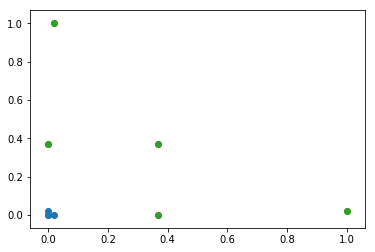

In [9]:
#print(X_new)
plt.scatter(X_new[y==0,0], X_new[y==0,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.savefig("gaussian classification")
plt.show()

In [10]:
#RBF核
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

100 [1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1
 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0]


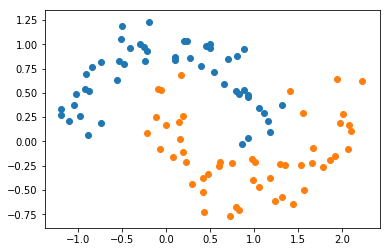

In [11]:
#加载数据
X, y = datasets.make_moons(noise=0.15, random_state=666)
print(len(X), y)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.savefig("原始数据的采集")
plt.show()

In [56]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=0.1, noise=0.1)

In [57]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [58]:
def RBFKernelSVC(gamma):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [59]:
svc = RBFKernelSVC(gamma=3)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=3, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [60]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/gavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


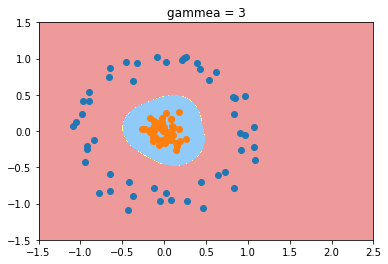

In [61]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.title("gammea = 3")
plt.savefig("gammea(3)")
plt.show()

In [62]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=100, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

/home/gavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


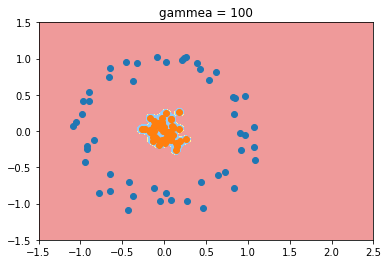

In [63]:
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.title("gammea = 100")
plt.savefig("gammea(100)")
plt.show()

In [64]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=10, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

/home/gavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


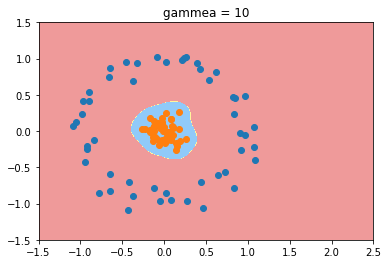

In [65]:
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.title("gammea = 10")
plt.savefig("gammea(10)")
plt.show()

In [66]:
svc_gamma05 = RBFKernelSVC(gamma=0.5)
svc_gamma05.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.5, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

/home/gavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


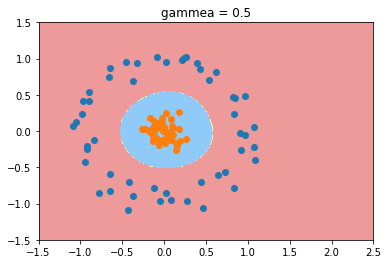

In [67]:
plot_decision_boundary(svc_gamma05, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.title("gammea = 0.5")
plt.savefig("gammea(05)")

plt.show()

In [70]:
svc_gamma01 = RBFKernelSVC(gamma=0.01)
svc_gamma01.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.01, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

/home/gavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


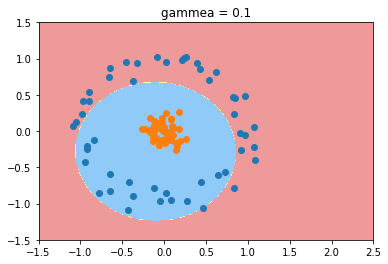

In [75]:
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.title("gammea = 0.1")
plt.savefig("./imgs/gammea(01)")
plt.show()

### 3.Svm解决线性回归问题

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [51]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', LinearSVR(epsilon=epsilon))
    ])

In [52]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVR',
                 LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [119]:
svr.score(X_test, y_test)

0.6359669792536711

In [123]:
svr.named_steps

{'std_scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'linearSVR': LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
           random_state=None, tol=0.0001, verbose=0)}